## Introducción a diferencias finitas
### Juan S. Hincapié - Carlos Duque-Daza


### ¿Qué es el método de diferencias finitas?

<div align='justify'> El método de las diferencias finitas es utilizado para calcular de manera numérica las soluciones a las ecuaciones diferenciales usando ecuaciones algebraicas. Lo primero que se debe hacer para empezar a usar este método es obtener los esquemas de diferencias finitas que reemplazaran las derivadas infinitesimales y luego, aplicar dichos esquemas en cada uno de los nodos del dominio discretizado. ¿Cómo se obtienen los esquemas? Usando la serie de Taylor</div>

### ¿Qué esquema existen para aproximar la primera derivada?
Las más conocidas son:

$$
\begin{aligned}
& \text{FFD:} \frac{df}{dx} \approx \frac{f_{i+1}-f_{i}}{\Delta x} +  O(\Delta x) \\
& \text{BFD:}    \frac{df}{dx} \approx \frac{f_{i}-f_{i-1}}{\Delta x} +  O(\Delta x) \\
& \text{CFD:} \frac{df}{dx} \approx \frac{f_{i+1}-f_{i-1}}{2\Delta x} +  O(\Delta x)^2 
\end{aligned}
$$


### Esquemas temporales

<div align='justify'> Los esquemas anteriores sirven para aproximar derivadas espaciales. ¿Qué hacemos con las derivadas temporales? Debemos seguir usando Euler en sus diferentes versiones:</div>

Tenindo la siguiente EDP:
$$
\frac{df}{dt} = \phi (t,x,f)
$$

Esquema explícito (Euler hacia adelante):
$$
    \frac{f^{n+1}_{i}-f^{n}_{i}}{\Delta t} = \phi_i^{n} (t,x,f)
$$

Esquema implícito (Euler hacia atrás):
$$
    \frac{f^{n+1}_{i}-f^{n}_{i}}{\Delta t} = \phi_i^{n+1} (t,x,f)
$$

### ¡Practiquemos un poco!

* Discretice la siguiente EDP usando esquema explícito temporal, con esquemas espaciales hacia adelante
* Discretice la siguiente EDP usando esquema implícito temporal, con esquemas espaciales centrados


$$
    \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}  = 0
$$

Las condiciones de frontera:
* $u(t,0) = 0$ y  $u(t,2) = 0$

Condiciones iniciales:
* $u = 2$ para $0.5 \leq x \leq 1.0$ y $u = 0$ en el resto del dominio

In [2]:
import numpy as np
import matplotlib.pyplot as plt

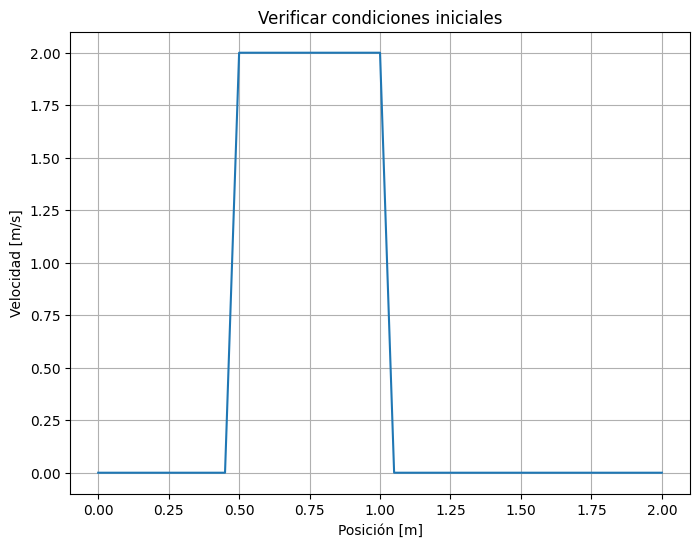

In [21]:
# Paso 00: discretizar el dominio espacial
x0 = 0; xf = 2.0; dx = 0.05
x = np.arange(x0, xf+dx, dx)

# Paso 01: discretizar el dominio temporal
t0 = 0; tf = 0.2; dt = 0.02
t = np.arange(t0, tf+dt, dt)

# Paso 02: asumir velocidad de la onda
c = 1

# Paso 03: crear vector de velocidad almacenar
# el valor de la velocidad en cada punto discreto
up = np.zeros(len(x))

# Paso 04: incluimos condiciones inciales
#print(x)
#print(int(0.5/dx))
#print(int(1.0/dx))
up[int(0.5/dx):int(1.0/dx)+1] = 2
#print(up)

# Paso 05: verificar condiciones iniciales
plt.figure(1, figsize=(8,6))
plt.plot(x, up)
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.title("Verificar condiciones iniciales")
plt.grid()
plt.show()

In [22]:
# Paso 06: hacemos un vector de velocidad para almacenar el futuro
uf = np.zeros(len(x))

# Paso 07: resolvemos todo el problema
for n in range(0, len(t)-1):
    for i in range(1, len(x)-1):
        uf[i] = up[i] - c*dt/dx*(up[i]-up[i-1])
    up = uf


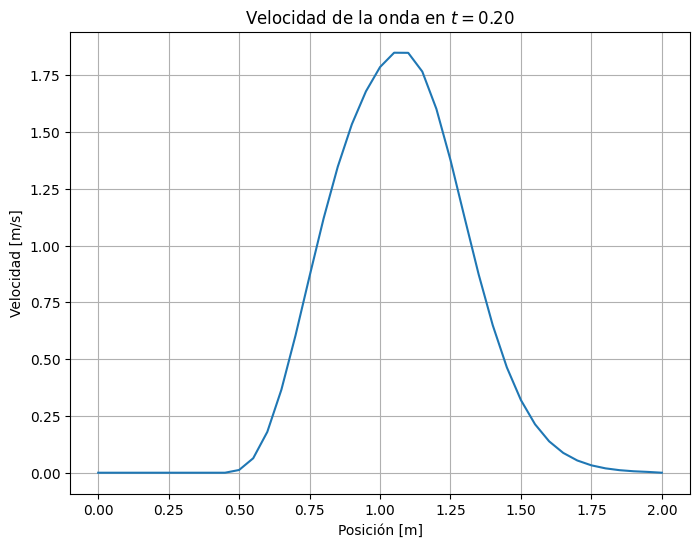

In [23]:
# Paso 08: plotear
plt.figure(2, figsize=(8,6))
plt.plot(x, up)
plt.xlabel("Posición [m]")
plt.ylabel("Velocidad [m/s]")
plt.title("Velocidad de la onda en $t={:.2f}$".format(t[-1]))
plt.grid()
plt.show()

### Actividad
* ¿Podría poner el solucionador en una función? Así queda más fácil y se pueden hacer experimentos numéricos
* ¿Qué ocurre si $dt=0.06$ y $dx=0.05$?
* Resuelva el problema anterior usando esquema espaciales hacia atrás